## End of distribution Imputation ==> Feature-Engine


### What is Feature-Engine

Feature-Engine is an open source python package that I created at the back of this course. 

- Feature-Engine includes all the feature engineering techniques described in the course
- Feature-Engine works like to Scikit-learn, so it is easy to learn
- Feature-Engine allows you to implement specific engineering steps to specific feature subsets
- Feature-Engine can be integrated with the Scikit-learn pipeline allowing for smooth model building
- 
**Feature-Engine allows you to design and store a feature engineering pipeline with bespoke procedures for different variable groups.**

-------------------------------------------------------------------
Feature-Engine can be installed via pip ==> pip install feature-engine

- Make sure you have installed feature-engine before running this notebook

For more information visit:
my website

## In this demo

We will use Feature-Engine to perform mean or median imputation using the Ames House Price Dataset.

- To download the dataset visit the lecture **Datasets** in **Section 1** of the course.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# from feature-engine
from feature_engine import missing_data_imputers as mdi

In [2]:
# let's load the dataset with a selected group of variables

cols_to_use = [
    'BsmtQual', 'FireplaceQu', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt',
    'SalePrice'
]

data = pd.read_csv('../AmesHousing.csv', usecols=cols_to_use)
data.head()

,LotFrontage,MasVnrArea,BsmtQual,FireplaceQu,GarageYrBlt,SalePrice
0,65.0,196.0,Gd,NaN,2003.0,208500
1,80.0,0.0,Gd,TA,1976.0,181500
2,68.0,162.0,Gd,TA,2001.0,223500
3,60.0,0.0,TA,Gd,1998.0,140000
4,84.0,350.0,Gd,TA,2000.0,250000


In [3]:
data.isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
BsmtQual       0.025342
FireplaceQu    0.472603
GarageYrBlt    0.055479
SalePrice      0.000000
dtype: float64

All the predictor variables contain missing data.

In [4]:
# let's separate into training and testing set

# first drop the target from the feature list
cols_to_use.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use],
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 5), (438, 5))

### Feature-Engine captures the numerical variables automatically

In [5]:
# we call the imputer from feature-engine

# we specify whether we want to find the values using
# the gaussian approximation or the inter-quantal range
# proximity rule.

# in addition we need to specify if we want the values placed at 
# the left or right tail

imputer = mdi.EndTailImputer(distribution='gaussian', tail='right')

In [6]:
# we fit the imputer

imputer.fit(X_train)

EndTailImputer(variables=['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])

In [7]:
# we see that the imputer found the numerical variables to
# impute with the end of distribution value

imputer.variables

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [8]:
# here we can see the values that will be used
# to replace NA for each variable

imputer.imputer_dict_

{'LotFrontage': 138.9022201686726,
 'MasVnrArea': 648.3947111415157,
 'GarageYrBlt': 2052.9707419772235}

In [9]:
# and this is how those values were calculated
# which is how we learnt in the first notebooks of
# this section

X_train[imputer.variables].mean() + 3 * X_train[imputer.variables].std()

LotFrontage     138.902220
MasVnrArea      648.394711
GarageYrBlt    2052.970742
dtype: float64

In [10]:
# feature-engine returns a dataframe

tmp = imputer.transform(X_train)
tmp.head()

,BsmtQual,FireplaceQu,LotFrontage,MasVnrArea,GarageYrBlt
64,Gd,NaN,138.90222,573.0,1998.000000
682,Gd,Gd,138.90222,0.0,1996.000000
960,TA,NaN,50.00000,0.0,2052.970742
1384,TA,NaN,60.00000,0.0,1939.000000
1100,TA,NaN,60.00000,0.0,1930.000000


In [11]:
# let's check that the numerical variables don't
# contain NA any more

tmp[imputer.variables].isnull().mean()

LotFrontage    0.0
MasVnrArea     0.0
GarageYrBlt    0.0
dtype: float64

## Feature-engine allows you to specify variable groups easily

In [12]:
# let's do it imputation but this time
# and let's do it over 2 of the 3 numerival variables

# let's also select the proximity rule on the left tail

imputer = mdi.EndTailImputer(distribution='skewed', tail='left',
                             variables=['LotFrontage', 'MasVnrArea'])

imputer.fit(X_train)

EndTailImputer(distribution='skewed', tail='left',
               variables=['LotFrontage', 'MasVnrArea'])

In [13]:
# now the imputer uses only the variables we indicated

imputer.variables

['LotFrontage', 'MasVnrArea']

In [14]:
# and we can see the value assigned to each variable
imputer.imputer_dict_

{'LotFrontage': -8.0, 'MasVnrArea': -510.0}

In [15]:
# feature-engine returns a dataframe

tmp = imputer.transform(X_train)

# let's check null values are gone
tmp[imputer.variables].isnull().mean()

LotFrontage    0.0
MasVnrArea     0.0
dtype: float64

## Feature-engine can be used with the Scikit-learn pipeline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DA2C216DA0>,
      dtype=object)

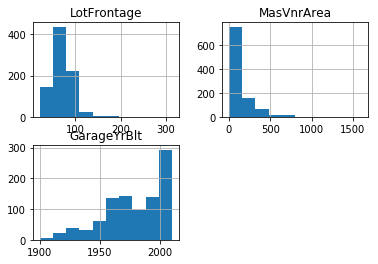

In [16]:
# let's look at the distributions to determine the
# end tail value selection method

X_train.hist()

All variables are skewed. For this demo, I will use the proximity rule for GarageYrBlt and MasVnrArea, and the Gaussian approximation for LotFrontage.

In [17]:
pipe = Pipeline([
    ('imputer_skewed', mdi.EndTailImputer(distribution='skewed', tail='right',
                                          variables=['GarageYrBlt', 'MasVnrArea'])),

    ('imputer_gaussian', mdi.EndTailImputer(distribution='gaussian', tail='right',
                                            variables=['LotFrontage'])),
])

In [18]:
pipe.fit(X_train)

Pipeline(steps=[('imputer_skewed',
                 EndTailImputer(distribution='skewed',
                                variables=['GarageYrBlt', 'MasVnrArea'])),
                ('imputer_gaussian',
                 EndTailImputer(variables=['LotFrontage']))])

In [19]:
pipe.named_steps['imputer_skewed'].imputer_dict_

{'GarageYrBlt': 2121.0, 'MasVnrArea': 680.0}

In [20]:
pipe.named_steps['imputer_gaussian'].imputer_dict_

{'LotFrontage': 138.9022201686726}

In [21]:
# let's transform the data with the pipeline
tmp = pipe.transform(X_train)

# let's check null values are gone
tmp.isnull().mean()

BsmtQual       0.023483
FireplaceQu    0.467710
LotFrontage    0.000000
MasVnrArea     0.000000
GarageYrBlt    0.000000
dtype: float64

There are no more null values for the 3 imputed numerical variables.